#### Pridicting Flight Delay By using Advance Machine Learning Algorithms.

**About Dataset**

The dataset contains the following features:
There are 22 columns for the dataset and corresponding column description are given below.  
    
1. Day of Month
2. Day of Week starting from Monday
3. Unique Carrier Code. 
4. An identification number assigned by US DOT to identify a unique airline (carrier). 
5. Code assigned by IATA and commonly used to identify a carrier. 
6. Tail Number
7. Flight Number
8. Origin Airport, Airport ID. An identification number assigned by US DOT to identify a unique airport.
9. Origin Airport, Airport Sequence ID. 
10. Origin Airport
11. Destination Airport, Airport ID. An identification number assigned by US DOT to identify a unique airport.
12. Destination Airport, Airport Sequence ID. 
13. Destination Airport.
14. Actual Departure Time (local time: hhmm)
15. Departure Delay Indicator, 15 Minutes or More (1=Yes, 0=No)
16. Departure Time Block, Hourly Intervals
17. Actual Arrival Time (local time: hhmm)
18. Arrival Delay Indicator, 15 Minutes or More (1=Yes, 0=No)
19. Cancelled Flight Indicator (1=Yes, 0=No)
20. Diverted Flight Indicator (1=Yes, 0=No)
21. Distance between airports (miles)  
22. Unnamed: 21 - no description available  

**Expected Outcome from the project**

1. Data Preprocessing. 
2. EDA and Feature Engineering
3. Statistical analysis of the data
4. Building and Training the Model
5. Evaluation Metics
6. Hyperparameter tuning
7. Results and Metrics

#### To download the dataset<a href="https://drive.google.com/drive/folders/1TLVlANW6cegman_WNTnXL9dRHRAdl8IU?usp=sharing" title="Google Drive"> Click here </a>

# Load the libraries

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
import statistics
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_auc_score,roc_curve
from xgboost import XGBClassifier


# Load the Data

In [2]:
df_2020=pd.read_csv('Jan_2020_ontime.csv')
df_2019=pd.read_csv('Jan_2019_ontime.csv')

df_2020.head()

,DAY_OF_MONTH,DAY_OF_WEEK,OP_UNIQUE_CARRIER,OP_CARRIER_AIRLINE_ID,OP_CARRIER,TAIL_NUM,OP_CARRIER_FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN_AIRPORT_SEQ_ID,ORIGIN,...,DEST,DEP_TIME,DEP_DEL15,DEP_TIME_BLK,ARR_TIME,ARR_DEL15,CANCELLED,DIVERTED,DISTANCE,Unnamed: 21
0,1,3,EV,20366,EV,N48901,4397,13930,1393007,ORD,...,GRB,1003.0,0.0,1000-1059,1117.0,0.0,0.0,0.0,174.0,NaN
1,1,3,EV,20366,EV,N16976,4401,15370,1537002,TUL,...,ORD,1027.0,0.0,1000-1059,1216.0,0.0,0.0,0.0,585.0,NaN
2,1,3,EV,20366,EV,N12167,4404,11618,1161802,EWR,...,TYS,1848.0,0.0,1800-1859,2120.0,0.0,0.0,0.0,631.0,NaN
3,1,3,EV,20366,EV,N14902,4405,10781,1078105,BTR,...,IAH,1846.0,0.0,1800-1859,2004.0,0.0,0.0,0.0,253.0,NaN
4,1,3,EV,20366,EV,N606UX,4407,14524,1452401,RIC,...,IAH,1038.0,0.0,1000-1059,1330.0,0.0,0.0,0.0,1157.0,NaN


In [3]:
df_2019.head()

,DAY_OF_MONTH,DAY_OF_WEEK,OP_UNIQUE_CARRIER,OP_CARRIER_AIRLINE_ID,OP_CARRIER,TAIL_NUM,OP_CARRIER_FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN_AIRPORT_SEQ_ID,ORIGIN,...,DEST,DEP_TIME,DEP_DEL15,DEP_TIME_BLK,ARR_TIME,ARR_DEL15,CANCELLED,DIVERTED,DISTANCE,Unnamed: 21
0,1,2,9E,20363,9E,N8688C,3280,11953,1195302,GNV,...,ATL,601.0,0.0,0600-0659,722.0,0.0,0.0,0.0,300.0,NaN
1,1,2,9E,20363,9E,N348PQ,3281,13487,1348702,MSP,...,CVG,1359.0,0.0,1400-1459,1633.0,0.0,0.0,0.0,596.0,NaN
2,1,2,9E,20363,9E,N8896A,3282,11433,1143302,DTW,...,CVG,1215.0,0.0,1200-1259,1329.0,0.0,0.0,0.0,229.0,NaN
3,1,2,9E,20363,9E,N8886A,3283,15249,1524906,TLH,...,ATL,1521.0,0.0,1500-1559,1625.0,0.0,0.0,0.0,223.0,NaN
4,1,2,9E,20363,9E,N8974C,3284,10397,1039707,ATL,...,FSM,1847.0,0.0,1900-1959,1940.0,0.0,0.0,0.0,579.0,NaN


In [4]:
df_2020.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607346 entries, 0 to 607345
Data columns (total 22 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   DAY_OF_MONTH           607346 non-null  int64  
 1   DAY_OF_WEEK            607346 non-null  int64  
 2   OP_UNIQUE_CARRIER      607346 non-null  object 
 3   OP_CARRIER_AIRLINE_ID  607346 non-null  int64  
 4   OP_CARRIER             607346 non-null  object 
 5   TAIL_NUM               606648 non-null  object 
 6   OP_CARRIER_FL_NUM      607346 non-null  int64  
 7   ORIGIN_AIRPORT_ID      607346 non-null  int64  
 8   ORIGIN_AIRPORT_SEQ_ID  607346 non-null  int64  
 9   ORIGIN                 607346 non-null  object 
 10  DEST_AIRPORT_ID        607346 non-null  int64  
 11  DEST_AIRPORT_SEQ_ID    607346 non-null  int64  
 12  DEST                   607346 non-null  object 
 13  DEP_TIME               600682 non-null  float64
 14  DEP_DEL15              600647 non-nu

In [5]:
df_2020.isnull().sum()

DAY_OF_MONTH                  0
DAY_OF_WEEK                   0
OP_UNIQUE_CARRIER             0
OP_CARRIER_AIRLINE_ID         0
OP_CARRIER                    0
TAIL_NUM                    698
OP_CARRIER_FL_NUM             0
ORIGIN_AIRPORT_ID             0
ORIGIN_AIRPORT_SEQ_ID         0
ORIGIN                        0
DEST_AIRPORT_ID               0
DEST_AIRPORT_SEQ_ID           0
DEST                          0
DEP_TIME                   6664
DEP_DEL15                  6699
DEP_TIME_BLK                  0
ARR_TIME                   7075
ARR_DEL15                  8078
CANCELLED                     0
DIVERTED                      0
DISTANCE                      0
Unnamed: 21              607346
dtype: int64

In [6]:
df_2019.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583985 entries, 0 to 583984
Data columns (total 22 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   DAY_OF_MONTH           583985 non-null  int64  
 1   DAY_OF_WEEK            583985 non-null  int64  
 2   OP_UNIQUE_CARRIER      583985 non-null  object 
 3   OP_CARRIER_AIRLINE_ID  583985 non-null  int64  
 4   OP_CARRIER             583985 non-null  object 
 5   TAIL_NUM               581442 non-null  object 
 6   OP_CARRIER_FL_NUM      583985 non-null  int64  
 7   ORIGIN_AIRPORT_ID      583985 non-null  int64  
 8   ORIGIN_AIRPORT_SEQ_ID  583985 non-null  int64  
 9   ORIGIN                 583985 non-null  object 
 10  DEST_AIRPORT_ID        583985 non-null  int64  
 11  DEST_AIRPORT_SEQ_ID    583985 non-null  int64  
 12  DEST                   583985 non-null  object 
 13  DEP_TIME               567633 non-null  float64
 14  DEP_DEL15              567630 non-nu

In [8]:
# now drop the unnamed column
df_2020.drop('Unnamed: 21',axis=1,inplace=True)
df_2019.drop('Unnamed: 21',axis=1,inplace=True)

# drop the duplicate columns
df_2020.drop('OP_CARRIER',axis=1,inplace=True)
df_2019.drop('OP_CARRIER',axis=1,inplace=True)

In [9]:
df_2020.head(2)

,DAY_OF_MONTH,DAY_OF_WEEK,OP_UNIQUE_CARRIER,OP_CARRIER_AIRLINE_ID,TAIL_NUM,OP_CARRIER_FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN_AIRPORT_SEQ_ID,ORIGIN,DEST_AIRPORT_ID,DEST_AIRPORT_SEQ_ID,DEST,DEP_TIME,DEP_DEL15,DEP_TIME_BLK,ARR_TIME,ARR_DEL15,CANCELLED,DIVERTED,DISTANCE
0,1,3,EV,20366,N48901,4397,13930,1393007,ORD,11977,1197705,GRB,1003.0,0.0,1000-1059,1117.0,0.0,0.0,0.0,174.0
1,1,3,EV,20366,N16976,4401,15370,1537002,TUL,13930,1393007,ORD,1027.0,0.0,1000-1059,1216.0,0.0,0.0,0.0,585.0


In [10]:
df_2020["TAIL_NUM"].fillna("UNKNOWN", inplace=True)
df_2019["TAIL_NUM"].fillna("UNKNOWN", inplace=True)


In [11]:
# For numerical features, missing values can be replaced with median values
num_features = ["DEP_TIME", "DEP_DEL15", "ARR_TIME", "ARR_DEL15"]
for feature in num_features:
    df_2020[feature].fillna(df_2020[feature].median(), inplace=True)
    df_2019[feature].fillna(df_2019[feature].median(), inplace=True)


In [12]:
# Verify missing values are handled
missing_2020_after = df_2020.isnull().sum()
missing_2019_after = df_2019.isnull().sum()

missing_2020_after, missing_2019_after

(DAY_OF_MONTH             0
 DAY_OF_WEEK              0
 OP_UNIQUE_CARRIER        0
 OP_CARRIER_AIRLINE_ID    0
 TAIL_NUM                 0
 OP_CARRIER_FL_NUM        0
 ORIGIN_AIRPORT_ID        0
 ORIGIN_AIRPORT_SEQ_ID    0
 ORIGIN                   0
 DEST_AIRPORT_ID          0
 DEST_AIRPORT_SEQ_ID      0
 DEST                     0
 DEP_TIME                 0
 DEP_DEL15                0
 DEP_TIME_BLK             0
 ARR_TIME                 0
 ARR_DEL15                0
 CANCELLED                0
 DIVERTED                 0
 DISTANCE                 0
 dtype: int64,
 DAY_OF_MONTH             0
 DAY_OF_WEEK              0
 OP_UNIQUE_CARRIER        0
 OP_CARRIER_AIRLINE_ID    0
 TAIL_NUM                 0
 OP_CARRIER_FL_NUM        0
 ORIGIN_AIRPORT_ID        0
 ORIGIN_AIRPORT_SEQ_ID    0
 ORIGIN                   0
 DEST_AIRPORT_ID          0
 DEST_AIRPORT_SEQ_ID      0
 DEST                     0
 DEP_TIME                 0
 DEP_DEL15                0
 DEP_TIME_BLK             0
 ARR_

# EDA

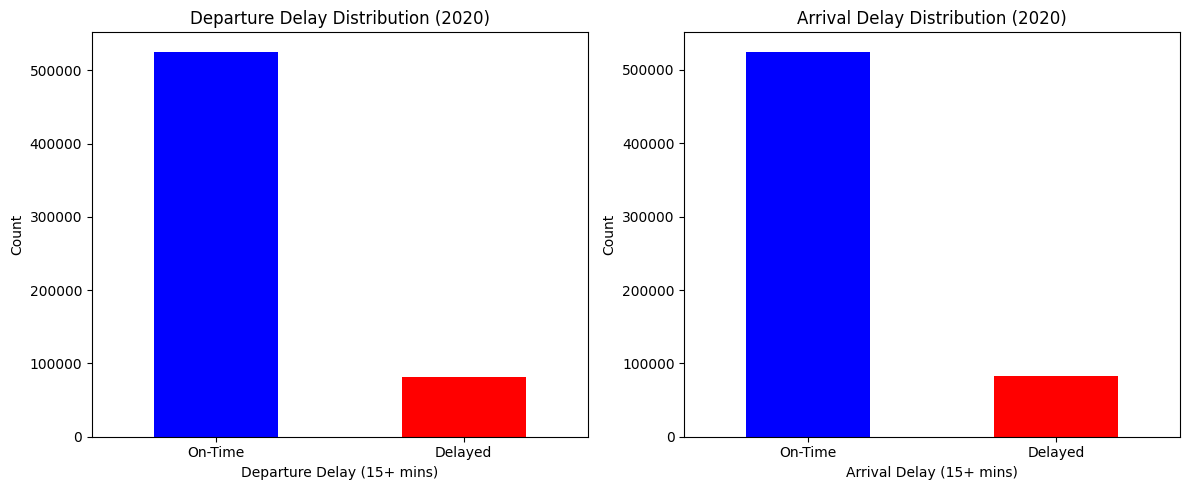

In [13]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Departure delay distribution
df_2020["DEP_DEL15"].value_counts().plot(kind="bar", ax=axes[0], color=["blue", "red"])
axes[0].set_title("Departure Delay Distribution (2020)")
axes[0].set_xticklabels(["On-Time", "Delayed"], rotation=0)
axes[0].set_xlabel("Departure Delay (15+ mins)")
axes[0].set_ylabel("Count")

# Arrival delay distribution
df_2020["ARR_DEL15"].value_counts().plot(kind="bar", ax=axes[1], color=["blue", "red"])
axes[1].set_title("Arrival Delay Distribution (2020)")
axes[1].set_xticklabels(["On-Time", "Delayed"], rotation=0)
axes[1].set_xlabel("Arrival Delay (15+ mins)")
axes[1].set_ylabel("Count")

plt.tight_layout()
plt.show()

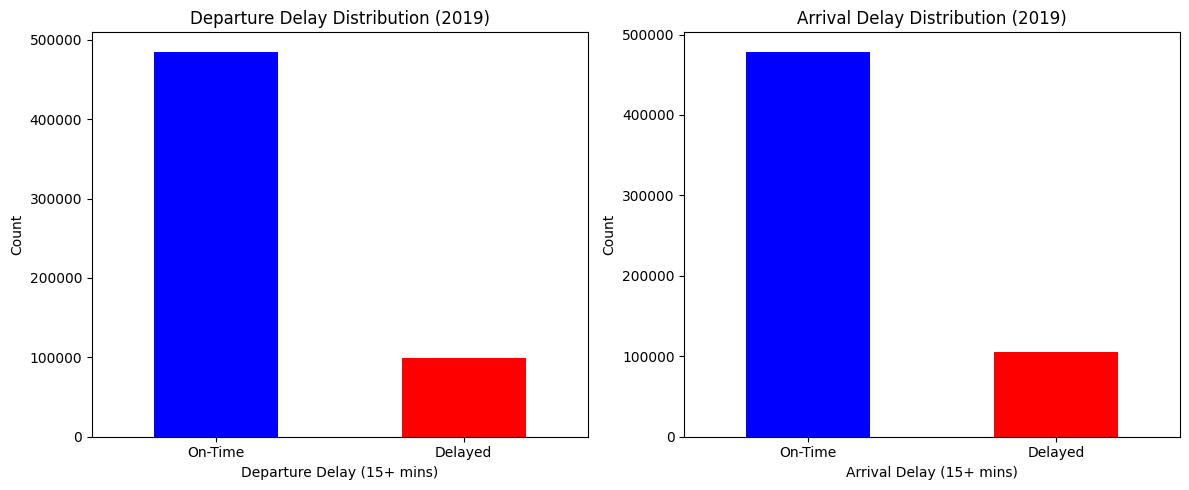

In [14]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Departure delay distribution
df_2019["DEP_DEL15"].value_counts().plot(kind="bar", ax=axes[0], color=["blue", "red"])
axes[0].set_title("Departure Delay Distribution (2019)")
axes[0].set_xticklabels(["On-Time", "Delayed"], rotation=0)
axes[0].set_xlabel("Departure Delay (15+ mins)")
axes[0].set_ylabel("Count")

# Arrival delay distribution
df_2019["ARR_DEL15"].value_counts().plot(kind="bar", ax=axes[1], color=["blue", "red"])
axes[1].set_title("Arrival Delay Distribution (2019)")
axes[1].set_xticklabels(["On-Time", "Delayed"], rotation=0)
axes[1].set_xlabel("Arrival Delay (15+ mins)")
axes[1].set_ylabel("Count")

plt.tight_layout()
plt.show()

As we can see in 2019 there are more number of delays of flights than 2020. 

In [15]:
# encode the categorical variable
label_enc = LabelEncoder()

# Encode ordinal categorical features
df_2020["DEP_TIME_BLK"] = label_enc.fit_transform(df_2020["DEP_TIME_BLK"])
df_2019["DEP_TIME_BLK"] = label_enc.fit_transform(df_2019["DEP_TIME_BLK"])
df_2019["OP_UNIQUE_CARRIER"]=label_enc.fit_transform(df_2019["OP_UNIQUE_CARRIER"])
df_2020["OP_UNIQUE_CARRIER"]=label_enc.fit_transform(df_2020["OP_UNIQUE_CARRIER"])


In [16]:
# Frequency Encoding
for col in ["ORIGIN", "DEST","TAIL_NUM",]:
    freq_encoding = df_2020[col].value_counts().to_dict()
    df_2020[col] = df_2020[col].map(freq_encoding)
    df_2019[col] = df_2019[col].map(freq_encoding)


In [17]:

df_2020["day_sin"] = np.sin(2 * np.pi * df_2020["DAY_OF_WEEK"] / 7)
df_2020["day_cos"] = np.cos(2 * np.pi * df_2020["DAY_OF_WEEK"] / 7)

df_2019["day_sin"] = np.sin(2 * np.pi * df_2019["DAY_OF_WEEK"] / 7)
df_2019["day_cos"] = np.cos(2 * np.pi * df_2019["DAY_OF_WEEK"] / 7)

In [18]:
df_2020.head()

,DAY_OF_MONTH,DAY_OF_WEEK,OP_UNIQUE_CARRIER,OP_CARRIER_AIRLINE_ID,TAIL_NUM,OP_CARRIER_FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN_AIRPORT_SEQ_ID,ORIGIN,DEST_AIRPORT_ID,...,DEP_TIME,DEP_DEL15,DEP_TIME_BLK,ARR_TIME,ARR_DEL15,CANCELLED,DIVERTED,DISTANCE,day_sin,day_cos
0,1,3,5,20366,130,4397,13930,1393007,25661,11977,...,1003.0,0.0,5,1117.0,0.0,0.0,0.0,174.0,0.433884,-0.900969
1,1,3,5,20366,114,4401,15370,1537002,1306,13930,...,1027.0,0.0,5,1216.0,0.0,0.0,0.0,585.0,0.433884,-0.900969
2,1,3,5,20366,48,4404,11618,1161802,11415,15412,...,1848.0,0.0,13,2120.0,0.0,0.0,0.0,631.0,0.433884,-0.900969
3,1,3,5,20366,118,4405,10781,1078105,604,12266,...,1846.0,0.0,13,2004.0,0.0,0.0,0.0,253.0,0.433884,-0.900969
4,1,3,5,20366,119,4407,14524,1452401,1981,12266,...,1038.0,0.0,5,1330.0,0.0,0.0,0.0,1157.0,0.433884,-0.900969


In [19]:
df_2019.head()

,DAY_OF_MONTH,DAY_OF_WEEK,OP_UNIQUE_CARRIER,OP_CARRIER_AIRLINE_ID,TAIL_NUM,OP_CARRIER_FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN_AIRPORT_SEQ_ID,ORIGIN,DEST_AIRPORT_ID,...,DEP_TIME,DEP_DEL15,DEP_TIME_BLK,ARR_TIME,ARR_DEL15,CANCELLED,DIVERTED,DISTANCE,day_sin,day_cos
0,1,2,0,20363,144.0,3280,11953,1195302,462.0,10397,...,601.0,0.0,1,722.0,0.0,0.0,0.0,300.0,0.974928,-0.222521
1,1,2,0,20363,152.0,3281,13487,1348702,12429.0,11193,...,1359.0,0.0,9,1633.0,0.0,0.0,0.0,596.0,0.974928,-0.222521
2,1,2,0,20363,167.0,3282,11433,1143302,13195.0,11193,...,1215.0,0.0,7,1329.0,0.0,0.0,0.0,229.0,0.974928,-0.222521
3,1,2,0,20363,180.0,3283,15249,1524906,589.0,10397,...,1521.0,0.0,10,1625.0,0.0,0.0,0.0,223.0,0.974928,-0.222521
4,1,2,0,20363,156.0,3284,10397,1039707,32190.0,11778,...,1847.0,0.0,14,1940.0,0.0,0.0,0.0,579.0,0.974928,-0.222521


# feature engineering

In [20]:
# duration represented as hours
df_2019['FLIGHT_DURATION'] = (df_2019['ARR_TIME'] - df_2019['DEP_TIME'])/3600
df_2020['FLIGHT_DURATION'] = (df_2020['ARR_TIME'] - df_2020['DEP_TIME'])/3600

df_2019['FLIGHT_DURATION'] = df_2019['FLIGHT_DURATION'].apply(lambda x: x + 24 if x < 0 else x)
df_2020['FLIGHT_DURATION'] = df_2020['FLIGHT_DURATION'].apply(lambda x: x + 24 if x < 0 else x)

In [21]:
df_2019.head()

,DAY_OF_MONTH,DAY_OF_WEEK,OP_UNIQUE_CARRIER,OP_CARRIER_AIRLINE_ID,TAIL_NUM,OP_CARRIER_FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN_AIRPORT_SEQ_ID,ORIGIN,DEST_AIRPORT_ID,...,DEP_DEL15,DEP_TIME_BLK,ARR_TIME,ARR_DEL15,CANCELLED,DIVERTED,DISTANCE,day_sin,day_cos,FLIGHT_DURATION
0,1,2,0,20363,144.0,3280,11953,1195302,462.0,10397,...,0.0,1,722.0,0.0,0.0,0.0,300.0,0.974928,-0.222521,0.033611
1,1,2,0,20363,152.0,3281,13487,1348702,12429.0,11193,...,0.0,9,1633.0,0.0,0.0,0.0,596.0,0.974928,-0.222521,0.076111
2,1,2,0,20363,167.0,3282,11433,1143302,13195.0,11193,...,0.0,7,1329.0,0.0,0.0,0.0,229.0,0.974928,-0.222521,0.031667
3,1,2,0,20363,180.0,3283,15249,1524906,589.0,10397,...,0.0,10,1625.0,0.0,0.0,0.0,223.0,0.974928,-0.222521,0.028889
4,1,2,0,20363,156.0,3284,10397,1039707,32190.0,11778,...,0.0,14,1940.0,0.0,0.0,0.0,579.0,0.974928,-0.222521,0.025833


In [22]:
# create a rush hour feature
def categorize_distances(DISTANCE):
    
    # Handle potential edge cases
    if not isinstance( DISTANCE, (int, float)):
        return 0
    
    # Convert to integer if it's a float
    DISTANCE = int( DISTANCE)
    
    #SHORT DISTANCE
    if 100 <=  DISTANCE < 100:
        return 0 
    
    # MEDIUM DISTANCE
    elif 1001 <=  DISTANCE < 3000:
        return 1
    
    #  LONG DISTANCE
    elif 3001<=DISTANCE<=5000:
        return 2
    else:
        return 0


df_2019['DISTANCE_travelled_category'] = df_2019['DISTANCE'].apply(categorize_distances)
df_2020['DISTANCE_travelled_category'] = df_2020['DISTANCE'].apply(categorize_distances)

In [23]:
df_2019.head()

,DAY_OF_MONTH,DAY_OF_WEEK,OP_UNIQUE_CARRIER,OP_CARRIER_AIRLINE_ID,TAIL_NUM,OP_CARRIER_FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN_AIRPORT_SEQ_ID,ORIGIN,DEST_AIRPORT_ID,...,DEP_TIME_BLK,ARR_TIME,ARR_DEL15,CANCELLED,DIVERTED,DISTANCE,day_sin,day_cos,FLIGHT_DURATION,DISTANCE_travelled_category
0,1,2,0,20363,144.0,3280,11953,1195302,462.0,10397,...,1,722.0,0.0,0.0,0.0,300.0,0.974928,-0.222521,0.033611,0
1,1,2,0,20363,152.0,3281,13487,1348702,12429.0,11193,...,9,1633.0,0.0,0.0,0.0,596.0,0.974928,-0.222521,0.076111,0
2,1,2,0,20363,167.0,3282,11433,1143302,13195.0,11193,...,7,1329.0,0.0,0.0,0.0,229.0,0.974928,-0.222521,0.031667,0
3,1,2,0,20363,180.0,3283,15249,1524906,589.0,10397,...,10,1625.0,0.0,0.0,0.0,223.0,0.974928,-0.222521,0.028889,0
4,1,2,0,20363,156.0,3284,10397,1039707,32190.0,11778,...,14,1940.0,0.0,0.0,0.0,579.0,0.974928,-0.222521,0.025833,0


In [24]:
# statistical summary
df_2020.describe()

,DAY_OF_MONTH,DAY_OF_WEEK,OP_UNIQUE_CARRIER,OP_CARRIER_AIRLINE_ID,TAIL_NUM,OP_CARRIER_FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN_AIRPORT_SEQ_ID,ORIGIN,DEST_AIRPORT_ID,...,DEP_TIME_BLK,ARR_TIME,ARR_DEL15,CANCELLED,DIVERTED,DISTANCE,day_sin,day_cos,FLIGHT_DURATION,DISTANCE_travelled_category
count,607346.000000,607346.000000,607346.000000,607346.000000,607346.000000,607346.000000,607346.000000,6.073460e+05,607346.000000,607346.000000,...,607346.000000,607346.000000,607346.000000,607346.000000,607346.000000,607346.000000,6.073460e+05,607346.000000,607346.000000,607346.000000
mean,16.014354,3.955735,8.533194,19994.137492,133.553085,2622.365261,12657.389167,1.265743e+06,11156.593306,12657.196320,...,8.041884,1478.377003,0.135483,0.011407,0.001893,798.022341,-2.680835e-02,-0.082410,0.947314,0.274695
std,8.990719,1.910205,5.322536,375.754232,45.553776,1822.545302,1524.407203,1.524405e+05,8811.454226,1524.279269,...,4.837748,522.486804,0.342239,0.106193,0.043473,587.282639,7.019219e-01,0.706963,4.471291,0.450557
min,1.000000,1.000000,0.000000,19393.000000,1.000000,1.000000,10135.000000,1.013506e+06,1.000000,10135.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,31.000000,-9.749279e-01,-0.900969,0.000000,0.000000
25%,8.000000,2.000000,4.000000,19790.000000,104.000000,1070.000000,11292.000000,1.129202e+06,3938.000000,11292.000000,...,4.000000,1101.000000,0.000000,0.000000,0.000000,369.000000,-7.818315e-01,-0.900969,0.034444,0.000000
50%,16.000000,4.000000,10.000000,19977.000000,133.000000,2177.000000,12889.000000,1.288903e+06,10312.000000,12889.000000,...,8.000000,1513.000000,0.000000,0.000000,0.000000,641.000000,-2.449294e-16,-0.222521,0.053889,0.000000
75%,24.000000,5.000000,14.000000,20378.000000,165.000000,4108.000000,14027.000000,1.402702e+06,15325.000000,14027.000000,...,12.000000,1916.000000,0.000000,0.000000,0.000000,1037.000000,7.818315e-01,0.623490,0.081111,1.000000
max,31.000000,7.000000,16.000000,20452.000000,698.000000,6860.000000,16869.000000,1.686901e+06,32190.000000,16869.000000,...,18.000000,2400.000000,1.000000,1.000000,1.000000,5095.000000,9.749279e-01,1.000000,23.999722,2.000000


In [26]:
delay_counts_2020 = df_2020["DEP_DEL15"].value_counts(normalize=True) * 100
delay_counts_2019 = df_2019["DEP_DEL15"].value_counts(normalize=True) * 100
print("\nPercentage of On-Time vs Delayed Flights:\n", delay_counts_2020)
print("\nPercentage of On-Time vs Delayed Flights:\n", delay_counts_2019)



Percentage of On-Time vs Delayed Flights:
 DEP_DEL15
0.0    86.517735
1.0    13.482265
Name: proportion, dtype: float64

Percentage of On-Time vs Delayed Flights:
 DEP_DEL15
0.0    83.06001
1.0    16.93999
Name: proportion, dtype: float64


In [27]:
df_20=df_2020.copy()
df_19=df_2019.copy()

In [28]:
drop_cols = ["DAY_OF_MONTH", "DAY_OF_WEEK", "OP_CARRIER_AIRLINE_ID", "ORIGIN_AIRPORT_ID",
             "ORIGIN_AIRPORT_SEQ_ID", "DEST_AIRPORT_ID", "DEST_AIRPORT_SEQ_ID", "TAIL_NUM"]
df_19 = df_19.drop(columns=drop_cols)
df_20=df_20.drop(columns=drop_cols)

In [29]:
# for jan 2020 data
# split the data into feature and target
x_20=df_20.drop(['DEP_DEL15','ARR_DEL15'],axis=1)
y_20=df_20['DEP_DEL15']

In [30]:
# split into train and test sets
x_train,x_test,y_train,y_test=train_test_split(x_20,y_20,test_size=0.2,random_state=42)

In [32]:
# use a random forest classifier
# Initialize model
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train model
model.fit(x_train, y_train)

# Predictions
y_pred = model.predict(x_test)
# 


In [36]:
y_pred_proba=model.predict_proba(x_test)[:,1]

In [33]:
# Evaluate performance
print("\nAccuracy:\n", accuracy_score(y_test, y_pred))
print("\nClassification report:\n", classification_report(y_test, y_pred))
print("\nConfusion matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy:
 0.9438626821437391

Classification report:
               precision    recall  f1-score   support

         0.0       0.94      1.00      0.97    105201
         1.0       0.95      0.61      0.74     16269

    accuracy                           0.94    121470
   macro avg       0.95      0.80      0.86    121470
weighted avg       0.94      0.94      0.94    121470


Confusion matrix:
 [[104692    509]
 [  6310   9959]]


In [44]:
# lets try to use a xgb classifier model
model1=XGBClassifier()
model1.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [45]:
y_pred1=model1.predict(x_test)

In [46]:
print("\nAccuracy:\n",accuracy_score(y_test,y_pred1))
print("\nClassification report:\n",classification_report(y_test,y_pred1))
print("\n Confusion matrix:\n",confusion_matrix(y_test,y_pred1))


Accuracy:
 0.9443977936939162

Classification report:
               precision    recall  f1-score   support

         0.0       0.95      0.99      0.97    105201
         1.0       0.93      0.64      0.75     16269

    accuracy                           0.94    121470
   macro avg       0.94      0.81      0.86    121470
weighted avg       0.94      0.94      0.94    121470


 Confusion matrix:
 [[104380    821]
 [  5933  10336]]
